In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm 
import pandas as pd
import theano
import arviz as az
import os
import seaborn as sns
save_figs = False
np.random.seed(123)
wd = os.getcwd()

In [2]:
# simulate data.
## define parameters.
n = 5
sigma_y = .1
sigma_x = .2
Theta = 10
## generate X, Y.
X = np.random.normal(loc = Theta, scale = sigma_x)
Y = np.random.normal(loc = X, scale = sigma_y, size = (n,))

In [3]:
# build CP model.
with pm.Model() as CP_model:
    # priors.
    theta = pm.Flat("theta")
    x = pm.Normal("x", mu = theta, sd = sigma_x)
    # Data likelihood
    y_like = pm.Normal('y_like', mu=x, sd=sigma_y, observed=Y)

In [4]:
with CP_model:
    step1 = pm.Metropolis(vars = [x, theta])
    CP_trace = pm.sample(draws=5000, tune=1000, step = [step1], chains = 1)[1000:]
    # uncomment for NUTS sampling. 
    #CP_trace = pm.sample(draws=5000, tune=1000, chains = 1)[1000:]

Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [theta]
>Metropolis: [x]


Sampling 1 chain for 1_000 tune and 5_000 draw iterations (1_000 + 5_000 draws total) took 1 seconds.
/home/felix/anaconda3/envs/bayesOpt/lib/python3.8/site-packages/arviz/data/base.py:169: UserWarning: More chains (5000) than draws (2). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
Only one chain was sampled, this makes it impossible to run some convergence checks


/home/felix/anaconda3/envs/bayesOpt/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/home/felix/anaconda3/envs/bayesOpt/lib/python3.8/site-packages/arviz/data/base.py:169: UserWarning: More chains (4000) than draws (2). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


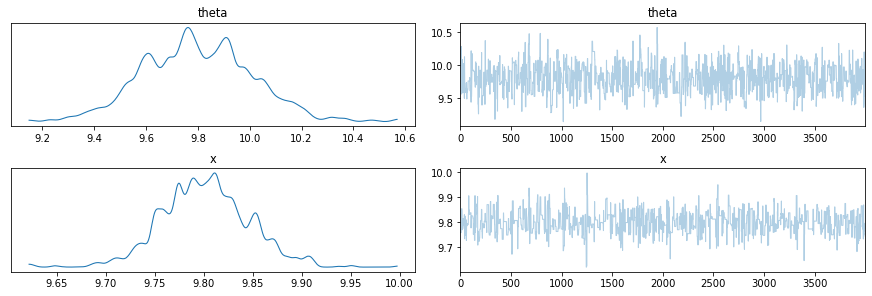

In [5]:
cp_fig = az.plot_trace(CP_trace, var_names=("theta", "x"))
fig = plt.gcf() 
if save_figs:
    fig.savefig(wd+"/figures/normal_rep_HM_cp_trace.pdf") 

In [6]:
az.summary(CP_trace)

/home/felix/anaconda3/envs/bayesOpt/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/home/felix/anaconda3/envs/bayesOpt/lib/python3.8/site-packages/arviz/data/base.py:169: UserWarning: More chains (4000) than draws (2). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
arviz - WARNING - Shape validation failed: input_shape: (1, 4000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
theta,9.799,0.208,9.450,10.209,0.009,0.006,583.0,582.0,580.0,527.0,NaN
x,9.802,0.044,9.724,9.886,0.002,0.001,626.0,626.0,614.0,554.0,NaN


In [7]:
x_post_cp = pd.Series(CP_trace['x'], name='x')
theta_post_cp = pd.Series(CP_trace['theta'], name='theta')
if save_figs:
    sns.jointplot(x_post_cp, theta_post_cp);

In [8]:
np.corrcoef(x_post_cp, theta_post_cp)

array([[1.        , 0.22047089],
       [0.22047089, 1.        ]])

In [9]:
# build NPC model.
with pm.Model() as NPC_model:
    # priors.
    theta = pm.Flat("theta")
    x_tilde = pm.Normal("x_tilde", mu = theta, sd = sigma_x)
    x = pm.Deterministic("x", theta + x_tilde)
    # Data likelihood
    y_like = pm.Normal('y_like', mu=x, sd=sigma_y, observed=Y)

In [10]:
with NPC_model:
    step1 = pm.Metropolis(vars = [theta, x_tilde, x])
    NPC_trace = pm.sample(draws=5000, tune=1000, step = [step1], chains = 1)[1000:]
    # uncomment for NUTS samling 
    #NPC_trace = pm.sample(draws=5000, tune=1000, chains = 1)[1000:]

Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [theta]
>Metropolis: [x_tilde]


Sampling 1 chain for 1_000 tune and 5_000 draw iterations (1_000 + 5_000 draws total) took 1 seconds.
/home/felix/anaconda3/envs/bayesOpt/lib/python3.8/site-packages/arviz/data/base.py:169: UserWarning: More chains (5000) than draws (2). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
Only one chain was sampled, this makes it impossible to run some convergence checks


/home/felix/anaconda3/envs/bayesOpt/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/home/felix/anaconda3/envs/bayesOpt/lib/python3.8/site-packages/arviz/data/base.py:169: UserWarning: More chains (4000) than draws (2). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


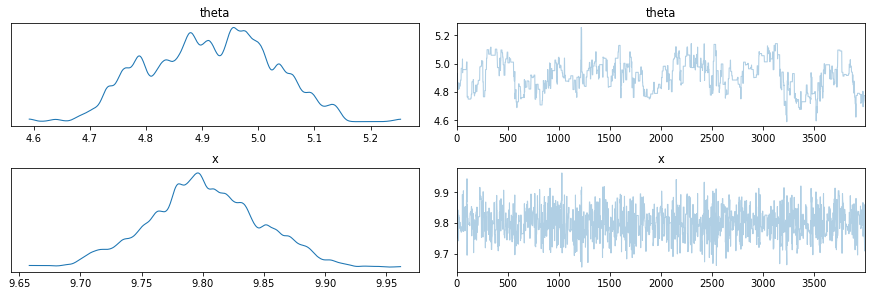

In [11]:
npc_fig = az.plot_trace(NPC_trace, var_names=("theta", "x"))
fig = plt.gcf()
if save_figs:
    fig.savefig(wd+"/figures/normal_rep_MH_npc_trace.pdf") 

In [13]:
az.summary(NPC_trace)

/home/felix/anaconda3/envs/bayesOpt/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/home/felix/anaconda3/envs/bayesOpt/lib/python3.8/site-packages/arviz/data/base.py:169: UserWarning: More chains (4000) than draws (2). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
arviz - WARNING - Shape validation failed: input_shape: (1, 4000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
theta,4.915,0.107,4.729,5.098,0.018,0.013,34.0,34.0,34.0,71.0,NaN
x_tilde,4.887,0.107,4.703,5.082,0.019,0.013,33.0,33.0,34.0,146.0,NaN
x,9.802,0.045,9.715,9.887,0.001,0.001,935.0,935.0,939.0,939.0,NaN


In [14]:
x_post_npc = pd.Series(NPC_trace['x'], name='x')
theta_post_npc = pd.Series(NPC_trace['theta'], name='theta')
fig = sns.jointplot(x_post_npc, theta_post_npc);
if save_figs:
    fig.savefig(wd+"/figures/normal_rep_MH_npc_joint.pdf") 